<CENTER>
<img src="img/PyDataLogoBig-Paris2015.png" width="50%">

  <header>
    <h1>Introduction to Pandas</h1>
    <h3>April 3rd, 2015</h3>
    <h2>Joris Van den Bossche</h2>
    <p></p>
Source: <a href="https://github.com/jorisvandenbossche/2015-PyDataParis">https://github.com/jorisvandenbossche/2015-PyDataParis</a>
  </header>
</CENTER>

# About me: Joris Van den Bossche

- PhD student at Ghent University and VITO, Belgium
- bio-science engineer, air quality research
- pandas core dev

->

- https://github.com/jorisvandenbossche
- [@jorisvdbossche](https://twitter.com/jorisvdbossche)


Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)


# Content of this talk

- Why do you need pandas?
- Basic introduction to the data structures
- Guided tour through some of the pandas features with a **case study about air quality**

If you want to follow along, this is a notebook that you can view or run yourself:

- All materials (notebook, data, link to nbviewer): https://github.com/jorisvandenbossche/2015-PyDataParis
- You need `pandas` > 0.15 (easy solution is using Anaconda)

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

pd.options.display.max_rows = 8

# Let's start with a showcase

## Case study: air quality in Europe

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [2]:
import airbase
data = airbase.load_data()

In [3]:
data

,BETR801,BETN029,FR04037,FR04012
1990-01-01 00:00:00,NaN,16.0,NaN,NaN
1990-01-01 01:00:00,NaN,18.0,NaN,NaN
1990-01-01 02:00:00,NaN,21.0,NaN,NaN
1990-01-01 03:00:00,NaN,26.0,NaN,NaN
...,...,...,...,...
2012-12-31 20:00:00,16.5,2.0,16,47
2012-12-31 21:00:00,14.5,2.5,13,43
2012-12-31 22:00:00,16.5,3.5,14,42
2012-12-31 23:00:00,15.0,3.0,13,49


to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

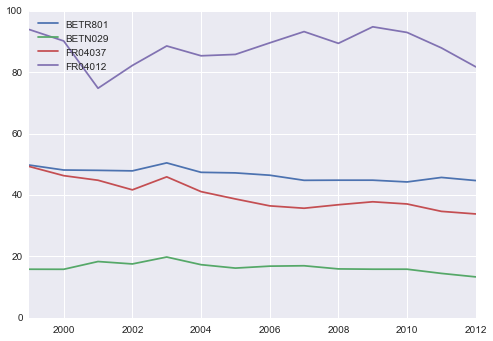

In [4]:
data['1999':].resample('A').plot(ylim=[0,100])

**How many exceedances of the limit values?**



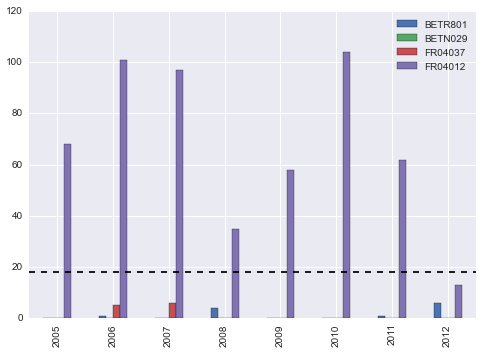

In [5]:
exceedances = data > 200
exceedances = exceedances.groupby(exceedances.index.year).sum()
ax = exceedances.loc[2005:].plot(kind='bar')
ax.axhline(18, color='k', linestyle='--')

**What is the difference in diurnal profile between weekdays and weekend?**

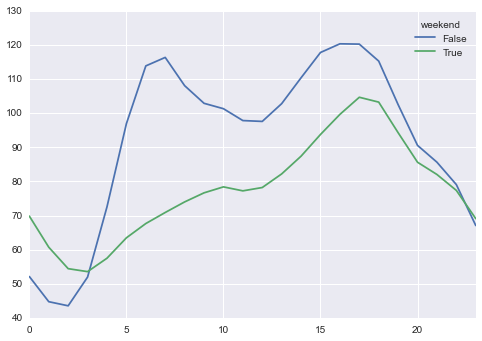

In [6]:
data['weekday'] = data.index.weekday
data['weekend'] = data['weekday'].isin([5, 6])
data_weekend = data.groupby(['weekend', data.index.hour])['FR04012'].mean().unstack(level=0)
data_weekend.plot()

We will come back to these example, and build them up step by step.

# Why do you need pandas?

## Why do you need pandas?

When working with *tabular or structured data* (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

# Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is ``pandas``?

* Pandas can be thought of as NumPy arrays with labels for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/

## Key features

* Fast, easy and flexible input/output for a lot of different data formats
* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Powerful time series manipulation (resampling, timezones, ..)
* Easy plotting

# Basic data structures

Pandas does this through two fundamental object types, both built upon NumPy arrays: the ``Series`` object, and the ``DataFrame`` object.

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [7]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [8]:
s.index

Int64Index([0, 1, 2, 3], dtype='int64')

You can access the underlying numpy array representation with the `.values` attribute:

In [9]:
s.values

array([ 0.1,  0.2,  0.3,  0.4])

We can access series values via the index, just like for NumPy arrays:

In [10]:
s[0]

0.10000000000000001

Unlike the NumPy array, though, this index can be something other than integers:

In [11]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int32

In [12]:
s2['c']

2

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value:

In [13]:
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
dtype: float64

In [14]:
population['France']

64.299999999999997

but with the power of numpy arrays:

In [15]:
population * 1000

Belgium           11300
France            64300
Germany           81300
Netherlands       16900
United Kingdom    64900
dtype: float64

We can index or slice the populations as expected:

In [16]:
population['Belgium']

11.300000000000001

In [17]:
population['Belgium':'Germany']

Belgium    11.3
France     64.3
Germany    81.3
dtype: float64

Many things you can do with numpy arrays, can also be applied on objects.

Fancy indexing, like indexing with a list or boolean indexing:

In [18]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [19]:
population[population > 20]

France            64.3
Germany           81.3
United Kingdom    64.9
dtype: float64

Element-wise operations:

In [20]:
population / 100

Belgium           0.113
France            0.643
Germany           0.813
Netherlands       0.169
United Kingdom    0.649
dtype: float64

A range of methods:

In [21]:
population.mean()

47.739999999999995

### Alignment!

Only, pay attention to **alignment**: operations between series will align on the index:  

In [22]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [23]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [24]:
s2

France     64.3
Germany    81.3
dtype: float64

In [25]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


<img src="img/dataframe.png" width=110%>



One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [26]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [27]:
countries.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [28]:
countries.columns

Index([u'area', u'capital', u'country', u'population'], dtype='object')

To check the data types of the different columns:

In [29]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

An overview of that information can be given with the `info()` method:

In [30]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 160.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [31]:
countries.values

array([[30510L, 'Brussels', 'Belgium', 11.3],
       [671308L, 'Paris', 'France', 64.3],
       [357050L, 'Berlin', 'Germany', 81.3],
       [41526L, 'Amsterdam', 'Netherlands', 16.9],
       [244820L, 'London', 'United Kingdom', 64.9]], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [32]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


To access a Series representing a column in the data, use typical indexing syntax:

In [33]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.

Let's compute density of each country:

In [34]:
countries['population']*1000000 / countries['area']

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

Adding a new column to the dataframe is very simple:

In [35]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


We can use masking to select certain data:

In [36]:
countries[countries['density'] > 300]

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
Netherlands,41526,Amsterdam,16.9,406.973944


And we can do things like sorting the items in the array, and indexing to take the first two rows:

In [37]:
countries.sort_index(by='density', ascending=False)

,area,capital,population,density
country,,,,
Netherlands,41526,Amsterdam,16.9,406.973944
Belgium,30510,Brussels,11.3,370.370370
United Kingdom,244820,London,64.9,265.092721
Germany,357050,Berlin,81.3,227.699202
France,671308,Paris,64.3,95.783158


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [38]:
countries.describe()

,area,population,density
count,5.000000,5.000000,5.000000
mean,269042.800000,47.740000,273.183879
std,264012.827994,31.519645,123.440607
min,30510.000000,11.300000,95.783158
25%,41526.000000,16.900000,227.699202
50%,244820.000000,64.300000,265.092721
75%,357050.000000,64.900000,370.370370
max,671308.000000,81.300000,406.973944


The `plot` method can be used to quickly visualize the data in different ways:

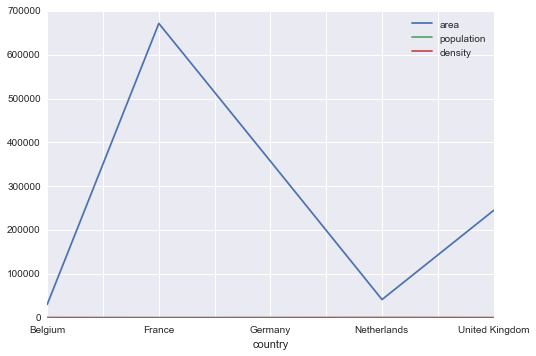

In [39]:
countries.plot()

However, for this dataset, it does not say that much.

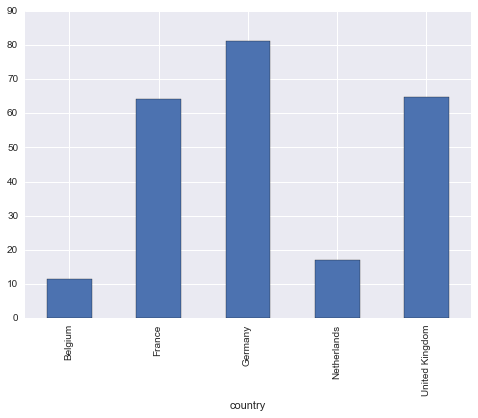

In [40]:
countries['population'].plot(kind='bar')

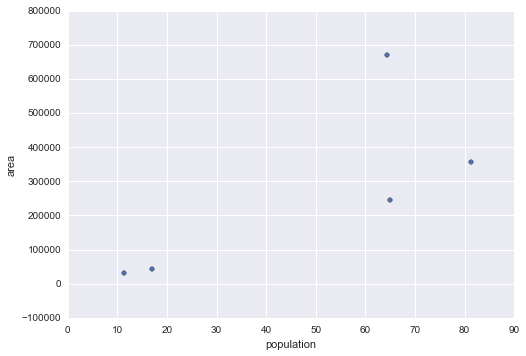

In [41]:
countries.plot(kind='scatter', x='population', y='area')

The available plotting types: ‘line’ (default), ‘bar’, ‘barh’, ‘hist’, ‘box’ , ‘kde’, ‘area’, ‘pie’, ‘scatter’, ‘hexbin’.



In [42]:
countries = countries.drop(['density'], axis=1)

## Some notes on selecting data

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. We now have to distuinguish between:

- selection by label
- selection by position.

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [43]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

or multiple columns:

In [44]:
countries[['area', 'density']]

,area,density
country,,
Belgium,30510,370.370370
France,671308,95.783158
Germany,357050,227.699202
Netherlands,41526,406.973944
United Kingdom,244820,265.092721


But, slicing accesses the rows:

In [45]:
countries['France':'Netherlands']

,area,capital,population,density
country,,,,
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944


For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [46]:
countries.loc['Germany', 'area']

357050

In [47]:
countries.loc['France':'Germany', :]

,area,capital,population,density
country,,,,
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202


In [49]:
countries.loc[countries['density']>300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


Selecting by position with `iloc` works similar as indexing numpy arrays:

In [50]:
countries.iloc[0:2,1:3]

,capital,population
country,,
Belgium,Brussels,11.3
France,Paris,64.3


The different indexing methods can also be used to assign data:

In [ ]:
countries.loc['Belgium':'Germany', 'population'] = 10

In [ ]:
countries

There are many, many more interesting operations that can be done on Series and DataFrame objects, but rather than continue using this toy data, we'll instead move to a real-world example, and illustrate some of the advanced concepts along the way.

# Case study: air quality data of European monitoring stations (AirBase)

## AirBase (The European Air quality dataBase)

AirBase: hourly measurements of all air quality monitoring stations from Europe.

In [12]:
from IPython.display import HTML
HTML('<iframe src=http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country width=700 height=350></iframe>')

# Importing and cleaning the data

## Importing and exporting data with pandas

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [ ]:
pd.read

In [ ]:
countries.to

## Now for our case study

I downloaded some of the raw data files of AirBase and included it in the repo:

> station code: BETR801, pollutant code: 8 (nitrogen dioxide)

In [26]:
!head -1 ./data/BETR8010000800100hour.1-1-1990.31-12-2012

Just reading the tab-delimited data:

In [43]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')

In [44]:
data.head()

,1990-01-01,-999.000,0,-999.000.1,0.1,-999.000.2,0.2,-999.000.3,0.3,-999.000.4,...,-999.000.19,0.19,-999.000.20,0.20,-999.000.21,0.21,-999.000.22,0.22,-999.000.23,0.23
0,1990-01-02,-999,0,-999,0,-999,0,-999,0,-999,...,57,1,58,1,54,1,49,1,48,1
1,1990-01-03,51,1,50,1,47,1,48,1,51,...,84,1,75,1,-999,0,-999,0,-999,0
2,1990-01-04,-999,0,-999,0,-999,0,-999,0,-999,...,69,1,65,1,64,1,60,1,59,1
3,1990-01-05,51,1,51,1,48,1,50,1,51,...,-999,0,-999,0,-999,0,-999,0,-999,0
4,1990-01-06,-999,0,-999,0,-999,0,-999,0,-999,...,-999,0,-999,0,-999,0,-999,0,-999,0


Not really what we want.

With using some more options of `read_csv`:

In [45]:
colnames = ['date'] + [item for pair in zip(["{:02d}".format(i) for i in range(24)], ['flag']*24) for item in pair]

data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012",
                   sep='\t', header=None, na_values=[-999, -9999], names=colnames)

In [46]:
data.head()

,date,00,flag,01,flag,02,flag,03,flag,04,...,19,flag,20,flag,21,flag,22,flag,23,flag
0,1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,1990-01-02,NaN,1,NaN,1,NaN,1,NaN,1,NaN,...,57,1,58,1,54,1,49,1,48,1
2,1990-01-03,51,0,50,0,47,0,48,0,51,...,84,0,75,0,NaN,0,NaN,0,NaN,0
3,1990-01-04,NaN,1,NaN,1,NaN,1,NaN,1,NaN,...,69,1,65,1,64,1,60,1,59,1
4,1990-01-05,51,0,51,0,48,0,50,0,51,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


So what did we do:

- specify that the values of -999 and -9999 should be regarded as NaN
- specified are own column names

For now, we disregard the 'flag' columns

In [47]:
data = data.drop('flag', axis=1)
data

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,59.0,58,59.0,58.0,57.0,58.0,54.0,49.0,48.0
2,1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74,70.0,70.0,69.0,65.0,64.0,60.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,2012-12-28,26.5,28.5,35.5,32.0,35.5,50.5,62.5,74.5,76.0,...,56.5,52.0,55,53.5,49.0,46.5,42.5,38.5,30.5,26.5
8389,2012-12-29,21.5,16.5,13.0,13.0,16.0,23.5,23.5,27.5,46.0,...,48.0,41.5,36,33.0,25.5,21.0,22.0,20.5,20.0,15.0
8390,2012-12-30,11.5,9.5,7.5,7.5,10.0,11.0,13.5,13.5,17.5,...,NaN,25.0,25,25.5,24.5,25.0,18.5,17.0,15.5,12.5
8391,2012-12-31,9.5,8.5,8.5,8.5,10.5,15.5,18.0,23.0,25.0,...,NaN,NaN,28,27.5,26.0,21.0,16.5,14.5,16.5,15.0


Now, we want to reshape it: our goal is to have the different hours as row indices, merged with the date into a datetime-index.

## Intermezzo: reshaping your data with `stack`, `unstack` and `pivot`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

<img src="img/stack.png" width=70%>

In [48]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


To use `stack`/`unstack`, we need the values we want to shift from rows to columns or the other way around as the index:

In [49]:
df = df.set_index(['A', 'B'])
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [50]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [51]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


`pivot` is similar to `unstack`, but let you specify column names:

In [52]:
df.pivot(index='A', columns='B', values='C')

B,a,b
A,,
one,0,1
two,2,3


`pivot_table` is similar as `pivot`, but can work with duplicate indices and let you specify an aggregation function:

In [53]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [54]:
df.pivot_table(index='A', columns='B', values='C', aggfunc='count') #'mean'

B,a,b
A,,
one,2,1
two,1,2


## Back to our case study

We can now use `stack` to create a timeseries:

In [55]:
data = data.set_index('date')

In [56]:
data_stacked = data.stack()

In [57]:
data_stacked

date          
1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
                  ... 
2012-12-31  20    16.5
            21    14.5
            22    16.5
            23    15.0
dtype: float64

Now, lets combine the two levels of the index:

In [58]:
data_stacked = data_stacked.reset_index(name='BETR801')

In [59]:
data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['level_1'], format="%Y-%m-%d%H")

In [60]:
data_stacked = data_stacked.drop(['date', 'level_1'], axis=1)

In [61]:
data_stacked

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
...,...
2012-12-31 20:00:00,16.5
2012-12-31 21:00:00,14.5
2012-12-31 22:00:00,16.5
2012-12-31 23:00:00,15.0


For this talk, I put the above code in a separate function, and repeated this for some different monitoring stations:

In [62]:
import airbase
no2 = airbase.load_data()

- FR04037 (PARIS 13eme): urban background site at Square de Choisy
- FR04012 (Paris, Place Victor Basch): urban traffic site at Rue d'Alesia
- BETR802: urban traffic site in Antwerp, Belgium
- BETN029: rural background site in Houtem, Belgium

See http://www.eea.europa.eu/themes/air/interactive/no2

# Exploring the data

Some useful methods:

`head` and `tail`

In [63]:
no2.head(3)

,BETR801,BETN029,FR04037,FR04012
1990-01-01 00:00:00,NaN,16,NaN,NaN
1990-01-01 01:00:00,NaN,18,NaN,NaN
1990-01-01 02:00:00,NaN,21,NaN,NaN


In [64]:
no2.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28,67
2012-12-31 20:00:00,16.5,2.0,16,47
2012-12-31 21:00:00,14.5,2.5,13,43
2012-12-31 22:00:00,16.5,3.5,14,42
2012-12-31 23:00:00,15.0,3.0,13,49


`info()`

In [65]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198895 entries, 1990-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    170794 non-null float64
BETN029    174807 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 7.6 MB


Getting some basic summary statistics about the data with `describe`:

In [66]:
no2.describe()

,BETR801,BETN029,FR04037,FR04012
count,170794.000000,174807.000000,120384.000000,119448.000000
mean,47.914561,16.687756,40.040005,87.993261
std,22.230921,13.106549,23.024347,41.317684
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,7.000000,23.000000,61.000000
50%,46.000000,12.000000,37.000000,88.000000
75%,61.000000,23.000000,54.000000,115.000000
max,339.000000,115.000000,256.000000,358.000000


Quickly visualizing the data

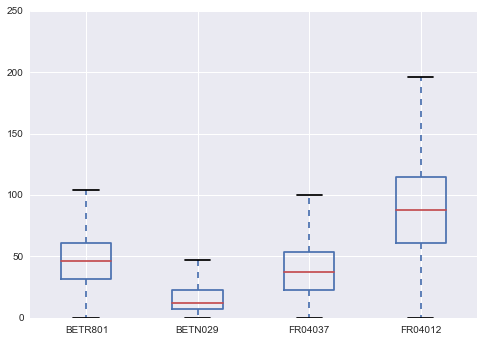

In [67]:
 no2.plot(kind='box', ylim=[0,250])

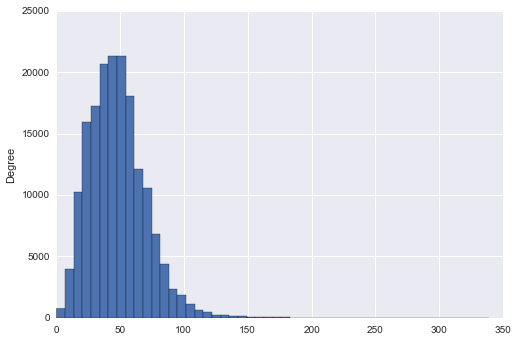

In [68]:
no2['BETR801'].plot(kind='hist', bins=50)

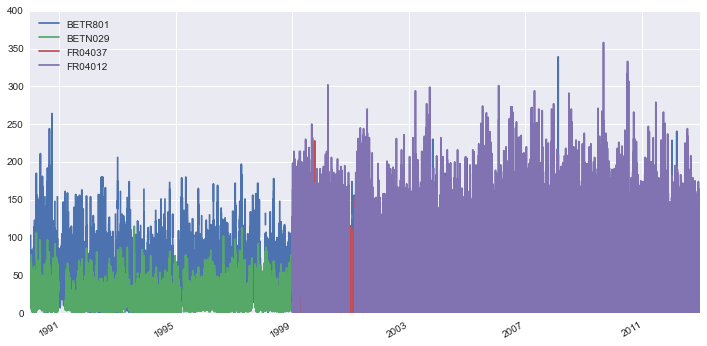

In [69]:
no2.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

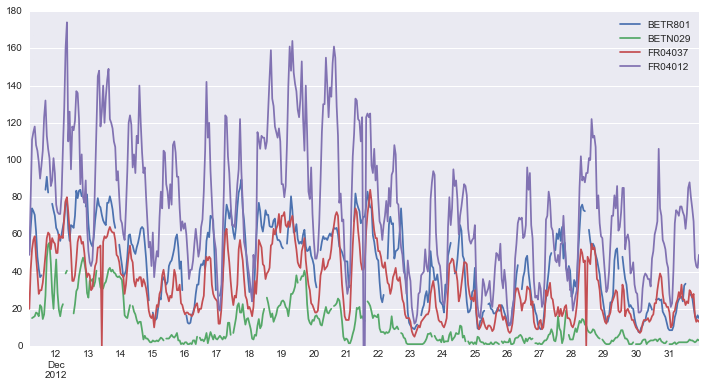

In [70]:
no2[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> next section!

## Working with time series data

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [71]:
no2.index

<class 'pandas.tseries.index.DatetimeIndex'>
[1990-01-01 00:00:00, ..., 2012-12-31 23:00:00]
Length: 198895, Freq: None, Timezone: None

Indexing a time series works with strings:

In [72]:
no2["2010-01-01 09:00": "2010-01-01 12:00"]

,BETR801,BETN029,FR04037,FR04012
2010-01-01 09:00:00,17,7,19,41
2010-01-01 10:00:00,18,5,21,48
2010-01-01 11:00:00,17,4,23,63
2010-01-01 12:00:00,18,4,22,57


A nice feature is "partial string" indexing, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2012:

In [73]:
no2['2012']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17,56
2012-01-01 01:00:00,18.0,1.0,16,50
2012-01-01 02:00:00,20.0,1.0,14,46
2012-01-01 03:00:00,16.0,1.0,17,47
...,...,...,...,...
2012-12-31 20:00:00,16.5,2.0,16,47
2012-12-31 21:00:00,14.5,2.5,13,43
2012-12-31 22:00:00,16.5,3.5,14,42
2012-12-31 23:00:00,15.0,3.0,13,49


Or all data of January up to March 2012:

In [74]:
data['2012-01':'2012-03']

,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,21,18,20.0,16.0,13,17.0,15.0,13.0,15.0,15.0,...,31.5,33.5,32.5,30,25.0,20.0,14.0,13,15.0,14
2012-01-02,NaN,NaN,10.5,12.0,12,39.0,49.5,52.5,45.0,48.0,...,32.0,38.0,43.0,61,56.0,46.0,39.0,33,24.0,20
2012-01-03,18,NaN,NaN,14.0,23,31.5,36.0,40.0,32.5,26.0,...,24.0,28.0,25.0,28,25.0,26.0,22.0,21,20.0,19
2012-01-04,16,16,NaN,13.0,14,17.0,26.0,33.0,36.0,36.0,...,41.0,42.0,52.5,48,39.0,32.5,23.0,16,13.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-26,56,53,56.0,53.0,53,NaN,NaN,48.0,50.0,52.5,...,25.0,32.0,37.5,50,50.0,44.0,54.5,54,54.5,67
2012-02-27,59,47,50.0,51.5,59,65.0,NaN,NaN,70.0,62.0,...,56.0,61.0,70.0,68,60.0,56.0,54.0,42,36.0,28
2012-02-28,24,23,20.0,21.0,27,43.0,55.0,NaN,NaN,47.0,...,49.0,55.0,61.0,59,61.0,53.5,52.0,52,50.0,48
2012-02-29,45,39,35.0,32.5,34,47.0,51.5,52.5,NaN,NaN,...,50.0,56.0,61.0,67,73.5,73.0,72.5,70,69.0,62


Time and date components can be accessed from the index:

In [75]:
no2.index.hour

array([ 0,  1,  2, ..., 21, 22, 23])

In [76]:
no2.index.year

array([1990, 1990, 1990, ..., 2012, 2012, 2012])

## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [77]:
no2.resample('D').head()

,BETR801,BETN029,FR04037,FR04012
1990-01-01,NaN,21.500000,NaN,NaN
1990-01-02,53.923077,35.000000,NaN,NaN
1990-01-03,63.000000,29.136364,NaN,NaN
1990-01-04,65.250000,42.681818,NaN,NaN
1990-01-05,63.846154,40.136364,NaN,NaN


By default, `resample` takes the mean as aggregation function, but other methods can also be specified:

In [78]:
no2.resample('D', how='max').head()

,BETR801,BETN029,FR04037,FR04012
1990-01-01,NaN,41,NaN,NaN
1990-01-02,59,59,NaN,NaN
1990-01-03,103,47,NaN,NaN
1990-01-04,74,58,NaN,NaN
1990-01-05,84,67,NaN,NaN


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

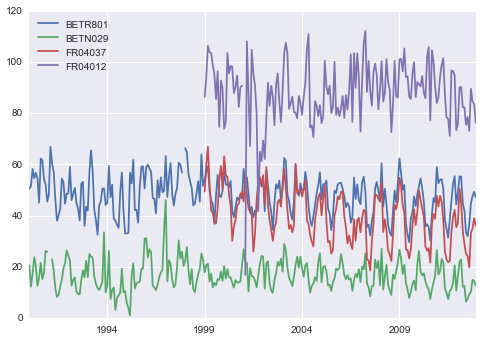

In [79]:
no2.resample('M').plot() # 'A'

In [ ]:
# no2['2012'].resample('D').plot()

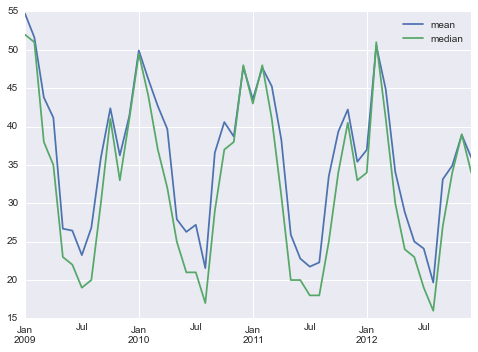

In [80]:
no2.loc['2009':, 'FR04037'].resample('M', how=['mean', 'median']).plot()

#### Question: The evolution of the yearly averages with, and the overall mean of all stations

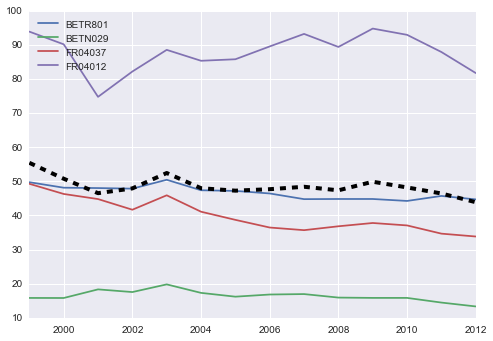

In [81]:
no2_1999 = no2['1999':]
no2_1999.resample('A').plot()
no2_1999.mean(axis=1).resample('A').plot(color='k', linestyle='--', linewidth=4)

# Analysing the data

## Intermezzo - the groupby operation (split-apply-combine)

By "group by" we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [82]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
3,5,A
...,...,...
5,15,C
6,10,A
7,15,B
8,20,C


In [83]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [84]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


## Back to the air quality data

**Question: how does the *typical monthly profile* look like for the different stations?**

First, we add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [85]:
no2['month'] = no2.index.month

Now, we can calculate the mean of each month over the different years:

In [86]:
no2.groupby('month').mean()

,BETR801,BETN029,FR04037,FR04012
month,,,,
1,50.927088,20.304075,47.634409,82.472813
2,54.168021,19.938929,50.564499,83.973207
3,54.598322,19.424205,47.862715,96.272138
4,51.491741,18.183433,40.943117,95.962862
...,...,...,...,...
9,49.220250,14.605979,39.706019,93.000316
10,50.894911,17.660149,44.010934,86.297836
11,50.254468,19.372193,45.564683,87.173878
12,48.644117,21.007089,45.262243,81.817977


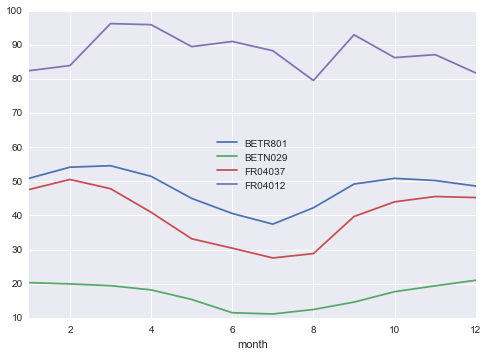

In [87]:
no2.groupby('month').mean().plot()

#### Question: The typical diurnal profile for the different stations

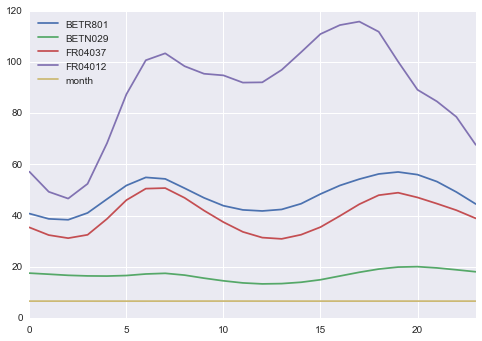

In [88]:
no2.groupby(no2.index.hour).mean().plot()

#### Question: What is the difference in the typical diurnal profile between week and weekend days.

In [89]:
no2.index.weekday?

In [90]:
no2['weekday'] = no2.index.weekday

Add a column indicating week/weekend

In [91]:
no2['weekend'] = no2['weekday'].isin([5, 6])

In [92]:
data_weekend = no2.groupby(['weekend', no2.index.hour]).mean()
data_weekend.head()

BETR801    BETN029    FR04037    FR04012     month   weekday
weekend                                                                  
False   0  40.008066  17.487512  34.439398  52.094663  6.520355  1.998157
        1  38.281875  17.162671  31.585121  44.721629  6.518121  1.997315
        2  38.601189  16.800076  30.865143  43.518539  6.520511  2.000000
        3  42.633946  16.591031  32.963500  51.942135  6.518038  2.002360
        4  49.853566  16.791971  40.780162  72.547472  6.514098  2.003883

In [93]:
data_weekend_FR04012 = data_weekend['FR04012'].unstack(level=0)
data_weekend_FR04012.head()

weekend,False,True
0,52.094663,69.817219
1,44.721629,60.697248
2,43.518539,54.407904
3,51.942135,53.534933
4,72.547472,57.472830


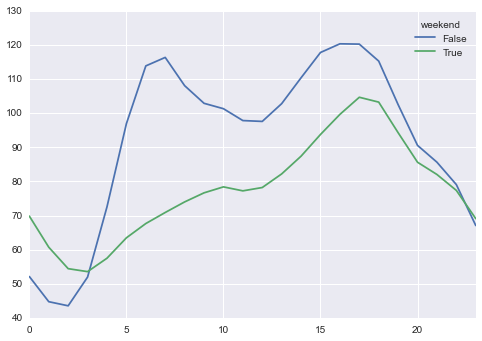

In [94]:
data_weekend_FR04012.plot()

#### Question: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?

In [95]:
exceedances = no2 > 200

In [96]:
# group by year and count exceedances (sum of boolean)
exceedances = exceedances.groupby(exceedances.index.year).sum()

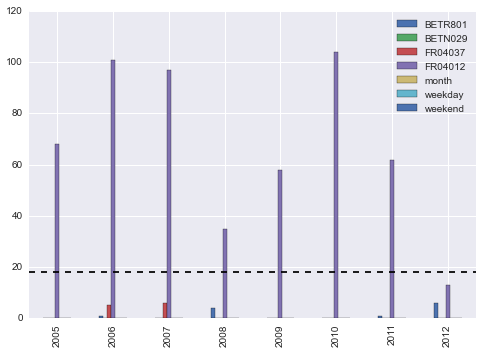

In [97]:
ax = exceedances.loc[2005:].plot(kind='bar')
ax.axhline(18, color='k', linestyle='--')

#### Question:  Visualize the typical week profile for the different stations as boxplots.

Tip: the boxplot method of a DataFrame expects the data for the different boxes in different columns)

In [98]:
# add a weekday and week column
no2['weekday'] = no2.index.weekday
no2['week'] = no2.index.week
no2.head()

,BETR801,BETN029,FR04037,FR04012,month,weekday,weekend,week
1990-01-01 00:00:00,NaN,16,NaN,NaN,1,0,False,1
1990-01-01 01:00:00,NaN,18,NaN,NaN,1,0,False,1
1990-01-01 02:00:00,NaN,21,NaN,NaN,1,0,False,1
1990-01-01 03:00:00,NaN,26,NaN,NaN,1,0,False,1
1990-01-01 04:00:00,NaN,21,NaN,NaN,1,0,False,1


In [99]:
# pivot table so that the weekdays are the different columns
data_pivoted = no2['2012'].pivot_table(columns='weekday', index='week', values='FR04037')
data_pivoted.head()

weekday,0,1,2,3,4,5,6
week,,,,,,,
1,24.625000,23.875000,26.208333,17.500000,40.208333,24.625000,22.375000
2,39.125000,44.125000,57.583333,50.750000,40.791667,34.750000,32.250000
3,45.208333,66.333333,51.958333,28.250000,28.291667,18.416667,18.333333
4,35.333333,49.500000,49.375000,48.916667,63.458333,34.250000,25.250000
5,47.791667,38.791667,54.333333,50.041667,51.458333,46.541667,35.458333


/home/joris/miniconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


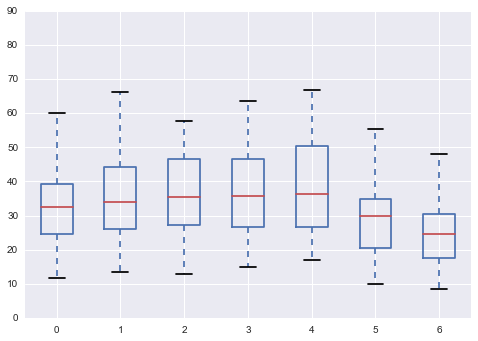

In [100]:
box = data_pivoted.boxplot()

**Exercise**: Calculate the correlation between the different stations

In [101]:
no2[['BETR801', 'BETN029', 'FR04037', 'FR04012']].corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.464085,0.561676,0.394446
BETN029,0.464085,1.000000,0.401864,0.186997
FR04037,0.561676,0.401864,1.000000,0.433466
FR04012,0.394446,0.186997,0.433466,1.000000


In [102]:
no2[['BETR801', 'BETN029', 'FR04037', 'FR04012']].resample('D').corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.581701,0.663855,0.459885
BETN029,0.581701,1.000000,0.527390,0.312484
FR04037,0.663855,0.527390,1.000000,0.453584
FR04012,0.459885,0.312484,0.453584,1.000000


In [103]:
no2 = no2[['BETR801', 'BETN029', 'FR04037', 'FR04012']]

# Further reading

- the documentation: http://pandas.pydata.org/pandas-docs/stable/
- Wes McKinney's book "Python for Data Analysis"
- lots of tutorials on the internet, eg http://github.com/jvns/pandas-cookbook


# What's new in pandas

Some recent enhancements of the last year (versions 0.14 to 0.16):

- Better integration for categorical data (`Categorical` and `CategoricalIndex`)
- The same for `Timedelta` and `TimedeltaIndex`
- More flexible SQL interface based on `sqlalchemy`
- MultiIndexing using slicers
- `.dt` accessor for accesing datetime-properties from columns
- Groupby enhancements
- And a lot of enhancements and bug fixes

# How can you help?

**We need you!**

Contributions are very welcome and can be in different domains:

- reporting issues
- improving the documentation
- testing release candidates and provide feedback
- triaging and fixing bugs
- implementing new features
- spreading the word

-> https://github.com/pydata/pandas


## Thanks for listening! Questions?


- https://github.com/jorisvandenbossche
- <mailto:jorisvandenbossche@gmail.com>
- [@jorisvdbossche](https://twitter.com/jorisvdbossche)


Slides and data: Source: https://github.com/jorisvandenbossche/2015-PyDataParis


Slides presented with 'live reveal' https://github.com/damianavila/RISE
